# Naif Bayes(Naive Bayes)

**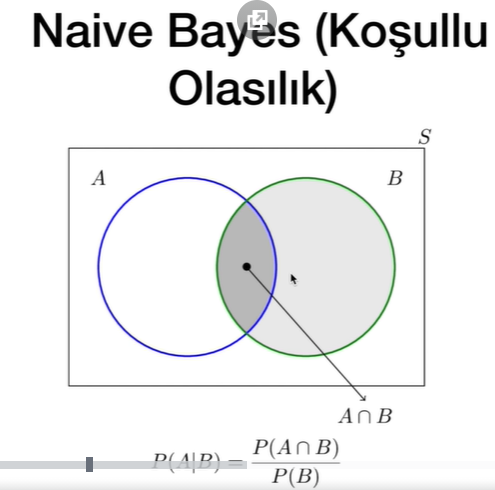**

**Bu resimden görebileceğimiz üzere koşullu olasılık, bir olay gerçekleşirken başka bir olayın aynı anda gerçekleşme ihtimali.**


**Yani B olayı gerçekleşiyor, B olayının üzerinde A olayının gerçekleşme ihitmali!**

**Örnek olarak yağmur yağma ihtimali ve benim şemsiyemi almış olma ihtimalim. Yağmur yağması gerek ki şemsiyemi alayım. Islanmama ihtimalim ise P(A|B) olarak ifade edilir.**

**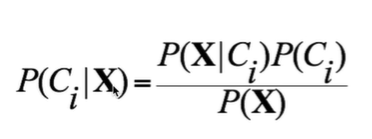**

**Naif bayes'de bayes teoremi kullanılır.**

**Bayes teoreminin bize sağladığı imkan, bu koşulların yerini değiştirebiliyor olmamız. Yani X'ten sonra C'nin gerçekleşmesi ile C gerçekleştikten sonra X'in gerçekleşmesi arasında bağlantı kurmamızı sağlar.**

**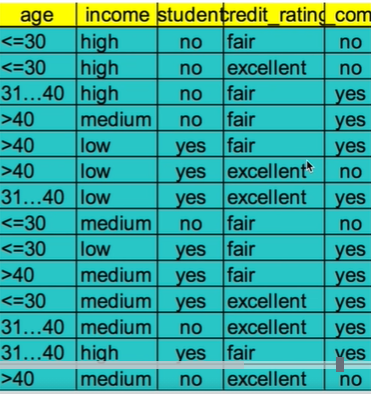**

**Bu örneğe göre bakarsak, yaşı 30'un altındakilerden kaç tanesi pc almıştır. Ya da öğrenci olanların kaç tanesi pc almıştır. Dolayısıyla biz, bilgisayar almayı etkileyen herhangi bir olayın bilgisayar alma üzerindeki etkisini ölçebiliyoruz.**

**Bu teoreme göre biz yaşı 30'un altında olup pc alıp almadığını bulabilirken aynı zamanda bilgisayar alıp yaşı 30'un altında değil mi bulabiliriz.**

**C1 : Bilgisayar alma oranı, C2: bilgisayar almama oranı. Bunları hesaplayacağız.**

**Naif bayes dengesiz kümeler üzerinde de çalışabiliyor!**

**Örnek olarak: yaş <= 30, income = med, student = yes, credit_rating = fair olan birisinin bilgisayar alıp almadığını hesaplayalım:**
    **Öncelikle bilgisayar alma ve almama ihtimalleri hesaplanır. P1(yes) = 9/14 = 0.643, P2(no) = 5/14 = 0.357**
    **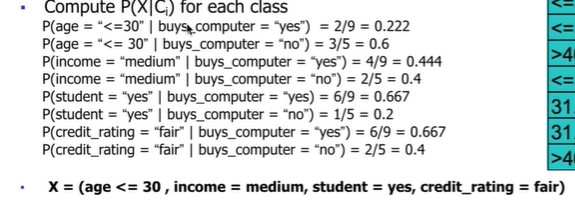**
    **Daha sonra yaşa göre alıp almama, gelire göre alıp almama vb. ihtimalleri hesaplanır.**
    **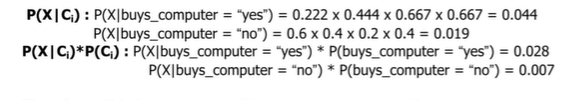**
    **Daha sonra yes olan koşulları ayrıca, no olan koşulları ayrıca çarpıyoruz. Çıkan yes sonucunu, tüm durumlardaki yes sonucu ile, çıkan no sonucunu ise tüm durumlarda çıkan no sonucu ile çarpıyoruz. Almış olanların alma ihtimalini arttırıyoruz, almama ihtimali düşük olanların almama ihtimalini daha da düşürüyoruz.**

**Başta almış olma ve almamış olma oranları arasında 2 kat fark varken en sondaki çarpımla bu oran 4 katına çıkıyor!**

**Bu sonuca göre, bu şartlara sahip kişi bilgisayar alır diyebiliriz. Çünkü 4 katı.**

**Sonuç olarak naif bayes, bu şartlara sahip olanları yes veya no sınıfına alıyor. Bunu yaparken de olasılıkları kullanıyor.**

**Bu algoritma olasılık kullanması bakımından bi avantaja sahip. Çok karmaşık, üzerinde çok bilgi içeren veri kümelerini basitleştiriyor. Bunu yaparken de öğreniyor, bu öğrenmeyi daha sonra tahmin içinde kullanıyor.**

**Bu yöntem lazy learning olarak geçer (K-NN'deki gibi) veri geldikten sonra acaba bu veri hangisine dahildir diye sorar. Eager Learning'de ise veri gelmeden önce elimizdeki veri kümesini öğrenir. Bütün ihtimaller için hesaplamaları ortaya çıkaracak(mesela yaşı 30'dan küçük mü, 30-40 arası mı, 40'tan büyük mü diye) sonra veri kümesini unutur ve kendi öğrendiği olasılıklara göre tahmin yapıyor.**

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

**3 farklı naive bayes dağılımı örnek olarak alınabilir. Gaussian naive bayes, Bernoulli naive bayes, Multinomial naive bayes**

**Tahmin edeceğimiz kolon, sürekli bir değerse (yani reel sayı olabiliyorsa, ondalıklı sayı olabiliyorsa gauss. Birbirinden farklı değerler varsa (kadın/erkek olması, okuduğu üniversite, arabasının modeli vb. gibi) bu değerleri (nomial değerler) sayısal veri haline getirmemiz gerekirse (yani int sayılar veriyorsak) bunların tahminini yapmak için multinomial. Bernoulli ise binary'dir. Yani 1 veya 0 ise cevap. Nomial olacak ancak iki değer alabilecek (kadın/erkek, evet/hayır soruları gibi) o zaman bernoulli kullanılır.**

**Reel sayılardan tam sayılara, tam sayılardan ikilik sayılara yani büyük uzaydan küçük uzaya indirgeme işlemlerini gauss ile yapmak daha çok mümkün.**

In [16]:
datas = pd.read_csv("veriler.csv")
datas

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [17]:
bky = datas.iloc[:, 1:4]
cins = datas.iloc[:, -1]

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(bky, cins, test_size=0.33, random_state=0)
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [19]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
ypred = gnb.predict(xtest)
print(ytest)
print(ypred)

20    k
10    k
14    k
13    k
1     e
21    k
11    k
19    k
Name: cinsiyet, dtype: object
['e' 'e' 'e' 'e' 'k' 'e' 'e' 'k']


In [20]:
cm = confusion_matrix(ytest, ypred)
cm
#sadece 1 tanesi doğru.

array([[0, 1],
       [6, 1]], dtype=int64)

In [33]:
#bernoulliyi kullanırsak
bnb = BernoulliNB()
bnb.fit(xtrain, ytrain)
ypred1 = bnb.predict(xtest)
print(ytest, ypred1)

20    k
10    k
14    k
13    k
1     e
21    k
11    k
19    k
Name: cinsiyet, dtype: object ['k' 'k' 'e' 'k' 'k' 'k' 'k' 'k']


In [36]:
cm1 = confusion_matrix(ytest, ypred1)
cm1
#bernouilli'yi kullanırsak doğru sayımız 6'ya çıkar.

array([[0, 1],
       [1, 6]], dtype=int64)